In [2]:
import pandas as pd
import glob, os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [3]:
ls crime_data_clean/years/

Final_crime10_clean.csv*  Final_crime13_clean.csv*  Final_crime16_clean.csv*
Final_crime11_clean.csv*  Final_crime14_clean.csv*  Final_crime17_clean.csv*
Final_crime12_clean.csv*  Final_crime15_clean.csv*


In [4]:
path = 'crime_data_clean/years/'

In [ ]:
all_files = glob.glob(os.path.join(path, "*.csv")) 

df_from_each_file = (pd.read_csv(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [ ]:
df.info()

In [ ]:
df.Date_Hour = pd.to_datetime(df.Date_Hour)
df = df.set_index('Date_Hour').sort_index(ascending=True)

In [ ]:
df.info()

In [ ]:
df.Hour.value_counts()

In [9]:
len(df.year.unique())

71

In [10]:
df.year.unique()

array([1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1924, 1926, 1927,
       1953, 1959, 1963, 1964, 1965, 1966, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2019, 2020, 2021, 2029, 2033])

In [11]:
df.month.unique()

array(['Sep', 'Nov', 'Dec', 'Jan', 'Apr', 'Jul', 'May', 'Jun', 'Aug',
       'Oct', 'Feb', 'Mar'], dtype=object)

In [20]:
df.year.value_counts(dropna=False)[:8]

2010    136357
2013    130200
2012    127486
2011    127168
2016    122423
2014    121450
2015    120079
2017    118578
Name: year, dtype: int64

In [13]:
df.weekday.value_counts(dropna=False)

Friday       154377
Monday       148218
Thursday     144822
Wednesday    144241
Tuesday      143437
Saturday     142584
Sunday       128643
Name: weekday, dtype: int64

In [14]:
df.month.value_counts(dropna=False)

Jul    88957
May    88471
Aug    88283
Dec    86742
Jan    85865
Oct    85075
Apr    83205
Jun    83013
Sep    81957
Nov    81738
Mar    81307
Feb    71709
Name: month, dtype: int64

In [15]:
df.day.value_counts(dropna=False).head()

1     36483
20    33865
15    33814
16    33367
17    33318
Name: day, dtype: int64

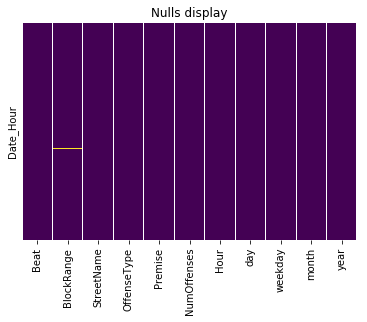

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Nulls display')
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006322 entries, 1914-09-08 07:00:00 to 2033-04-21 00:00:00
Data columns (total 11 columns):
Beat           1006322 non-null object
BlockRange     1006165 non-null object
StreetName     1006320 non-null object
OffenseType    1006322 non-null object
Premise        1006322 non-null object
NumOffenses    1006322 non-null float64
Hour           1006322 non-null int64
day            1006322 non-null int64
weekday        1006322 non-null object
month          1006322 non-null object
year           1006322 non-null int64
dtypes: float64(1), int64(3), object(7)
memory usage: 92.1+ MB


## Clenup index

In [25]:
df.tail()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
2019-12-25 19:00:00,10H20,4600-4699,BELL,Auto Theft,DRIVEWAY,1.0,19,25,Wednesday,Dec,2019
2020-10-11 22:00:00,16E40,13900-13999,FONDREN,Theft,SERVICE/GAS STATION,1.0,22,11,Sunday,Oct,2020
2021-01-03 00:00:00,15E40,2100-2199,EL PASEO,Theft,APARTMENT,1.0,0,3,Sunday,Jan,2021
2029-05-26 03:00:00,2A50,5400-5499,PETTY,Theft,OTHER/UNKNOWN,1.0,3,26,Saturday,May,2029
2033-04-21 00:00:00,2A60,900-999,T C JESTER,Theft,RESIDENCE/HOUSE,1.0,0,21,Thursday,Apr,2033


### Remove non days

In [26]:
len(df[df.index.isnull()])

0

In [27]:
len(df[df.index.notnull()])

1006322

In [ ]:
#df[df.index.isnull()]

In [ ]:
#df = df[df.index.notnull()]

In [ ]:
#len(df[df.index.isnull()])

In [28]:
df.day.value_counts(dropna=False).head()

1     36483
20    33865
15    33814
16    33367
17    33318
Name: day, dtype: int64

In [ ]:
df.info()

# Beat

In [29]:
len(df.Beat.unique())

127

In [30]:
df.Beat.unique()

array(['24C60', '18F60', '12D20', '3B10', '5F10', '1A20', '11H10',
       '19G20', '9C40', '9C30', '6B30', '10H70', '4F20', '18F20', '20G30',
       '19G40', '20G20', '17E20', '9C20', '19G10', '14D20', '8C20',
       '8C30', '17E40', '6B50', '12D70', 'UNK', '1A40', '7C10', '1A50',
       '10H40', '13D20', '18F10', '6B60', '10H50', '13D40', '2A30',
       '3B50', '19G50', '14D50', '1A10', '15E30', '12D50', '14D30',
       '8C60', '1A30', '18F40', '4F30', '20G50', '7C20', '3B30', '12D10',
       '15E10', '18F50', '14D10', '11H20', '5F30', '15E20', '23J50',
       '17E10', '6B10', '19G30', '18F30', '20G10', '2A40', '24C40',
       '14D40', '4F10', '10H60', '3B40', '10H80', '5F20', '16E40',
       '12D60', '6B40', '7C40', '13D30', '20G80', '10H20', '7C50',
       '15E40', '2A50', '8C50', '24C10', '20G40', '13D10', '2A20',
       '20G70', '7C30', '16E10', '12D30', '9C10', '16E30', '6B20', '2A10',
       '8C10', '21I20', '11H30', '24C20', '17E30', '10H30', '5F40',
       '2A60', '21I10', '10

# BlockRange

In [31]:
len(df.BlockRange.unique())

348

# StreetName

In [32]:
len(df.StreetName.unique())

24719

In [33]:
df.StreetName.unique()

array(['LAKE HOUSTON', 'BELLAIRE', 'GULF', ..., 'IVY BUSH BEND',
       'PO BOX 5124', 'LEHALL STREET'], dtype=object)

# OffenseType

In [34]:
len(df.OffenseType.unique())

8

In [35]:
df.OffenseType.unique()

array(['Burglary', 'Auto Theft', 'Theft', 'Rape', 'Aggravated Assault',
       'Robbery', 'Murder', '1'], dtype=object)

In [36]:
df.OffenseType.value_counts(dropna=False)

Theft                 554365
Burglary              182240
Auto Theft            100894
Aggravated Assault     82971
Robbery                76783
Rape                    7129
Murder                  1926
1                         14
Name: OffenseType, dtype: int64

# Premise

In [37]:
len(df.Premise.unique())

265

In [41]:
df.Premise.value_counts().head()

APARTMENT                74377
RESIDENCE/HOUSE          74346
APARTMENT PARKING LOT    65458
Residence or House       55408
Apartment Parking Lot    45677
Name: Premise, dtype: int64

# NumOffenses

In [42]:
len(df.NumOffenses.unique())

17

In [43]:
df.NumOffenses.unique()

array([ 1.,  2.,  4.,  3., 16.,  5.,  9.,  6., 13.,  7.,  8., 11., 29.,
       12., 17., 33., 10.])

In [44]:
df.NumOffenses.value_counts(dropna=False)

1.0     993646
2.0      10646
3.0       1611
4.0        247
5.0         80
6.0         46
7.0         15
8.0         10
9.0          4
13.0         4
16.0         3
10.0         3
12.0         2
17.0         2
11.0         1
33.0         1
29.0         1
Name: NumOffenses, dtype: int64

# Hour

In [45]:
len(df.Hour.unique())

24

In [46]:
df.Hour.unique()

array([ 7,  3, 19, 22, 23, 10, 13, 16, 15, 17, 12,  9, 14, 11, 18,  5,  8,
        6,  0, 20,  2, 21,  1,  4])

In [47]:
df.Hour.value_counts(dropna=False)  # need to  change 24 to 0

18    57416
12    57372
17    55942
15    55389
16    53942
19    52977
14    52428
20    51367
13    49751
22    48457
10    48215
11    47592
21    47300
9     45251
8     44967
0     43489
23    39759
7     36471
1     24245
6     24008
2     22512
3     17646
5     15499
4     14327
Name: Hour, dtype: int64

In [50]:
len(df.day.unique())

31

In [51]:
df.day.unique()

array([ 8,  2,  3,  5, 14, 24, 30, 29, 15, 25, 23,  6, 22, 20, 16, 18, 28,
       26,  9, 31,  1, 27, 12, 17,  7, 21, 13, 10, 11, 19,  4])

In [52]:
df.day.value_counts(dropna=False).head()

1     36483
20    33865
15    33814
16    33367
17    33318
Name: day, dtype: int64

In [53]:
df.day = pd.to_numeric(df.day)

In [54]:
len(df.day.unique())

31

In [55]:
df.day.unique()

array([ 8,  2,  3,  5, 14, 24, 30, 29, 15, 25, 23,  6, 22, 20, 16, 18, 28,
       26,  9, 31,  1, 27, 12, 17,  7, 21, 13, 10, 11, 19,  4])

In [56]:
df.day.value_counts(dropna=False).head()

1     36483
20    33865
15    33814
16    33367
17    33318
Name: day, dtype: int64

# weekday

In [57]:
df.weekday.unique()

array(['Tuesday', 'Monday', 'Thursday', 'Saturday', 'Friday', 'Wednesday',
       'Sunday'], dtype=object)

In [58]:
df.weekday.value_counts(dropna=False)

Friday       154377
Monday       148218
Thursday     144822
Wednesday    144241
Tuesday      143437
Saturday     142584
Sunday       128643
Name: weekday, dtype: int64

# month

In [59]:
df.month.unique()

array(['Sep', 'Nov', 'Dec', 'Jan', 'Apr', 'Jul', 'May', 'Jun', 'Aug',
       'Oct', 'Feb', 'Mar'], dtype=object)

In [60]:
df.month.value_counts(dropna=False)

Jul    88957
May    88471
Aug    88283
Dec    86742
Jan    85865
Oct    85075
Apr    83205
Jun    83013
Sep    81957
Nov    81738
Mar    81307
Feb    71709
Name: month, dtype: int64

# year

In [61]:
len(df.year.unique())

71

In [62]:
df.year.unique()

array([1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1924, 1926, 1927,
       1953, 1959, 1963, 1964, 1965, 1966, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2019, 2020, 2021, 2029, 2033])

In [63]:
df.year.value_counts(dropna=False)

2010    136357
2013    130200
2012    127486
2011    127168
2016    122423
2014    121450
2015    120079
2017    118578
2009      1596
2008       195
2001       146
2007       109
2005        98
2006        87
2000        56
2004        53
2003        40
2002        28
1999        12
1993         9
1980         9
1995         8
1915         8
1998         7
1992         6
1990         6
1916         6
1977         6
1972         5
1989         5
         ...  
1991         3
1988         3
1982         2
1973         2
2019         2
1997         2
1981         2
1969         2
1965         2
1976         2
1986         2
1978         2
1974         2
1985         2
2029         1
1921         1
2021         1
2020         1
1984         1
1918         1
1919         1
1927         1
1924         1
1926         1
1953         1
1959         1
1963         1
1975         1
1970         1
2033         1
Name: year, Length: 71, dtype: int64

In [64]:
df.year = pd.to_numeric(df.year)

In [65]:
len(df.year.unique())

71

In [66]:
df.year.unique()

array([1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1924, 1926, 1927,
       1953, 1959, 1963, 1964, 1965, 1966, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2019, 2020, 2021, 2029, 2033])

In [67]:
df.year.value_counts(dropna=False).head(11)

2010    136357
2013    130200
2012    127486
2011    127168
2016    122423
2014    121450
2015    120079
2017    118578
2009      1596
2008       195
2001       146
Name: year, dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006322 entries, 1914-09-08 07:00:00 to 2033-04-21 00:00:00
Data columns (total 11 columns):
Beat           1006322 non-null object
BlockRange     1006165 non-null object
StreetName     1006320 non-null object
OffenseType    1006322 non-null object
Premise        1006322 non-null object
NumOffenses    1006322 non-null float64
Hour           1006322 non-null int64
day            1006322 non-null int64
weekday        1006322 non-null object
month          1006322 non-null object
year           1006322 non-null int64
dtypes: float64(1), int64(3), object(7)
memory usage: 112.1+ MB


In [ ]:
len(df[df.isnull().any(axis=1)])

In [ ]:
df[df.isnull().any(axis=1)]

# Save Final Clean Data

In [ ]:
ls crime_data_clean/

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006322 entries, 1914-09-08 07:00:00 to 2033-04-21 00:00:00
Data columns (total 11 columns):
Beat           1006322 non-null object
BlockRange     1006165 non-null object
StreetName     1006320 non-null object
OffenseType    1006322 non-null object
Premise        1006322 non-null object
NumOffenses    1006322 non-null float64
Hour           1006322 non-null int64
day            1006322 non-null int64
weekday        1006322 non-null object
month          1006322 non-null object
year           1006322 non-null int64
dtypes: float64(1), int64(3), object(7)
memory usage: 112.1+ MB


In [71]:
df.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
1914-09-08 07:00:00,24C60,12700-12799,LAKE HOUSTON,Burglary,Restaurant or Cafeteria,1.0,7,8,Tuesday,Sep,1914
1914-11-02 03:00:00,18F60,8800-8899,BELLAIRE,Burglary,Miscellaneous Business (Non-Specific),1.0,3,2,Monday,Nov,1914
1914-12-03 19:00:00,12D20,12800-12899,GULF,Auto Theft,No label,1.0,19,3,Thursday,Dec,1914
1915-01-05 22:00:00,3B10,3200-3299,MANGUM RD 180,Theft,Other Parking Lot,1.0,22,5,Tuesday,Jan,1915
1915-01-14 23:00:00,5F10,7000-7099,WESTVIEW,Auto Theft,Apartment Parking Lot,1.0,23,14,Thursday,Jan,1915


In [73]:
df.Beat.value_counts()[:10]

19G10    21454
12D10    21269
1A20     20997
6B60     20110
13D20    19194
3B10     18251
18F20    17604
17E10    17494
5F30     16528
18F30    16521
Name: Beat, dtype: int64

In [77]:
df.BlockRange.value_counts(dropna=False)[:10]

900-999      13868
100-199      13831
800-899      11944
700-799      11737
2400-2499    11510
2300-2399    11431
1000-1099    11268
9400-9499    11255
7900-7999    11138
300-399      11007
Name: BlockRange, dtype: int64

In [79]:
df.StreetName.value_counts(dropna=False)

WESTHEIMER                     27611
GULF                           14183
GESSNER                        13952
NORTH                          12673
RICHMOND                       12406
KATY                           10156
SOUTHWEST                       9964
MAIN                            9274
BISSONNET                       9043
NORTHWEST                       8873
BELLAIRE                        8638
BELLFORT                        7714
FM 1960                         7451
BEECHNUT                        7097
GREENS                          7009
FONDREN                         6932
POST OAK                        6676
TIDWELL                         6403
LITTLE YORK                     6280
BROADWAY                        6278
EAST                            5776
SHEPHERD                        5617
WEST SAM HOUSTON                5559
SAM HOUSTON                     5260
AIRLINE                         5085
KIRBY                           4917
LOOP                            4676
H

In [81]:
df.OffenseType.value_counts(dropna=False)

Theft                 554365
Burglary              182240
Auto Theft            100894
Aggravated Assault     82971
Robbery                76783
Rape                    7129
Murder                  1926
1                         14
Name: OffenseType, dtype: int64

In [83]:
df.Premise.value_counts(dropna=False)

APARTMENT                                    74377
RESIDENCE/HOUSE                              74346
APARTMENT PARKING LOT                        65458
Residence or House                           55408
Apartment Parking Lot                        45677
ROAD/STREET/SIDEWALK                         41659
Road, Street, or Sidewalk                    40120
Apartment                                    39825
DRIVEWAY                                     37014
No label                                     33591
OTHER PARKING LOT                            30042
DEPARTMENT/DISCOUNT STORE                    24960
RESTAURANT/CAFETERIA PARKING LOT             16952
OTHER/UNKNOWN                                16634
Driveway                                     15731
Restaurant or Cafeteria Parking Lot          15519
Other Parking Lot                            14724
COMMERCIAL PARKING LOT/GARAGE                13878
Department or Discount Store                 13194
GROCERY/SUPERMARKET            

In [86]:
df.NumOffenses.value_counts(dropna=False)

1.0     993646
2.0      10646
3.0       1611
4.0        247
5.0         80
6.0         46
7.0         15
8.0         10
9.0          4
13.0         4
16.0         3
10.0         3
12.0         2
17.0         2
11.0         1
33.0         1
29.0         1
Name: NumOffenses, dtype: int64

In [89]:
df.NumOffenses = df.NumOffenses.astype(int)

In [90]:
df.NumOffenses.value_counts(dropna=False)

1     993646
2      10646
3       1611
4        247
5         80
6         46
7         15
8         10
9          4
13         4
10         3
16         3
12         2
17         2
29         1
11         1
33         1
Name: NumOffenses, dtype: int64

In [92]:
df.day.value_counts()

1     36483
20    33865
15    33814
16    33367
17    33318
22    33266
19    33235
12    33234
21    33231
2     33193
10    33141
11    33136
18    33096
23    33079
13    33043
3     33031
28    32980
7     32939
14    32854
26    32693
8     32631
5     32578
6     32500
24    32464
9     32457
4     32275
27    32219
25    31875
29    30875
30    30381
31    19069
Name: day, dtype: int64

In [95]:
df.weekday.value_counts(dropna=False)

Friday       154377
Monday       148218
Thursday     144822
Wednesday    144241
Tuesday      143437
Saturday     142584
Sunday       128643
Name: weekday, dtype: int64

In [99]:
df.month.value_counts(dropna=False)

Jul    88957
May    88471
Aug    88283
Dec    86742
Jan    85865
Oct    85075
Apr    83205
Jun    83013
Sep    81957
Nov    81738
Mar    81307
Feb    71709
Name: month, dtype: int64

## Slice year from 2010-2017

In [131]:
df = df['1/1/2010':'12/31/2017']

In [133]:
df.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
2010-01-01,10H10,500-599,EASTWOOD,Burglary,MISC. BUSINESS (NON-SPECIFIC),1,0,1,Friday,Jan,2010
2010-01-01,4F20,4800-4899,LAURELDALE,Aggravated Assault,RESIDENCE/HOUSE,1,0,1,Friday,Jan,2010
2010-01-01,1A10,300-399,HAMILTON,Auto Theft,BAR/NIGHT CLUB PARKING LOT,1,0,1,Friday,Jan,2010
2010-01-01,24C40,24000-24099,LAKE HOUSTON,Auto Theft,ROAD/STREET/SIDEWALK,1,0,1,Friday,Jan,2010
2010-01-01,24C10,21700-21799,LAKEPOINT,Theft,RESIDENCE/HOUSE,1,0,1,Friday,Jan,2010


In [136]:
df.to_csv('crime_data_clean/crime_final_clean10_17.csv')